In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


from pydataset import data

import acquire
import env

from scipy import stats
import math


# Project Objectives
The Code up Date Science team has been assigned to find out what causes customers to churn and how can we predict if a customer is about to churn



# Agenda

### Data dictionary / Acquisition
### Preparation 
### Exploration
### Statistical analysis
### Modeling 
### Prediction 
### Conclusion

In [2]:
telco_df = acquire.get_telco_data()
train, validate, test = acquire.prep_telco_data(telco_df)


## Data Dictionary/ Acquisition

1. The data is acquired from the Codeup sql database where specific credentials are neccessary to access it. 
2. After the data acquisition, the next process was tofigure out any unneccesary/ redundant columns and drop them.


Acquiring the data using the get_telco_data finction

In [3]:
telco_df = acquire.get_telco_data()
telco_df.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


#### available columns on the train dataset

In [81]:
train.head()

,senior_citizen,tenure,monthly_charges,total_charges,gender_Male,partner_Yes,dependents_Yes,multiple_lines_Yes,online_security_Yes,online_backup_Yes,...,streaming_tv_Yes,streaming_movies_Yes,paperless_billing_Yes,contract_type_One_year,contract_type_Two_year,internet_service_type_Fiber_optic,internet_service_type_None,payment_type_Credit_card_(automatic),payment_type_Electronic_check,payment_type_Mailed_check
4758,0,16,20.50,290.549988,1,1,1,0,0,0,...,0,0,0,0,1,0,1,0,0,1
5151,0,3,69.85,199.850006,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
6610,0,62,94.00,5757.200195,0,0,0,1,0,0,...,1,1,1,1,0,1,0,0,0,0
5871,1,3,77.00,237.750000,1,0,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
3491,0,11,19.25,180.300003,0,1,1,0,0,0,...,0,0,1,0,0,0,1,0,0,1


## Preparation

1. Transformed the total_charges column from a string to an integer for workability purposes.
2. Discovered nulls in the total_charges column where I opted to drop them since they are less than 1% of the dataset
3. Columns to be encoded into boolean values. "Yes" = 1, "No/No internet service" = 0. (online_security, online_backup, device_protection, tech_support, streaming_tv, streaming_movies) 
4. Cleaned up some of the columns that had spaces and replaced them with an underscore
5. Dropped all the columns that contained id. ('payment_type_id', 'internet_service_type_id','contract_type_id','customer_id','phone_service'). 
6. Lastly, used get dummies on on boolean columns to ensure ML model capability
7. split the data to Train, validate and test
8. All the necessary functions are available on the acquire.py file

Cleaning the telco exploration data

In [6]:
telco_df = telco_df[telco_df.total_charges!=" "]
telco_df["total_charges"] = pd.to_numeric(telco_df.total_charges)


## Data Exploration

### Univariate Analysis


#### Observing the churn rate of different tenure
it appears that customers of 10 months and under have a high churn rate

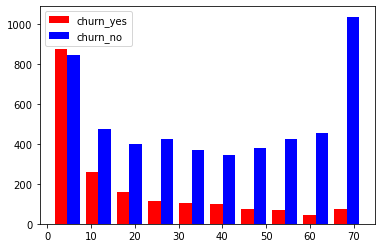

In [7]:
tenure_not_churn = telco_df[telco_df.churn == "No"].tenure
tenure_churn = telco_df[telco_df.churn == "Yes"].tenure


# plt.ylabel("$customers$")
# plt.xlabel ("$telco_df.tenure$")
# plt.title ("Tenure and Churned Customers")
plt.hist([tenure_churn, tenure_not_churn], 
          color = ["red", "blue"], 
          label = ["churn_yes", "churn_no"]) 
plt.legend()


#### Observing the churn rate of different monthly charges
it appears that customers that pay 70 ~ 110 have a higher churn rate


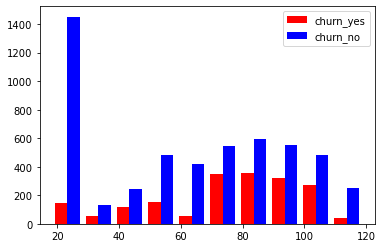

In [8]:
mc_not_churn = telco_df[telco_df.churn == "No"].monthly_charges
mc_churn = telco_df[telco_df.churn == "Yes"].monthly_charges


# plt.ylabel("$customers$")
# plt.xlabel ("$telco_df.tenure$")
# plt.title ("Tenure and Churned Customers")
plt.hist([mc_churn, mc_not_churn], 
          color = ["red", "blue"], 
          label = ["churn_yes", "churn_no"]) 
plt.legend()


#### Observing the churn rate of different payment types

It appears that payment_type_id 1 (which represents electronic check payment) appears to have the highest churn rate among payment methods

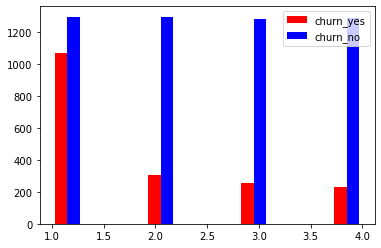

In [9]:
payment_type_id_not_churn = telco_df[telco_df.churn == "No"].payment_type_id
payment_type_id_churn = telco_df[telco_df.churn == "Yes"].payment_type_id


# plt.ylabel("$customers$")
# plt.xlabel ("$telco_df.tenure$")
# plt.title ("Tenure and Churned Customers")
plt.hist([payment_type_id_churn, payment_type_id_not_churn], 
          color = ["red", "blue"], 
          label = ["churn_yes", "churn_no"]) 
plt.legend()


#### Observing the churn rate of different internet service type
It appears that Fiber optic churn customers churn the most in this category

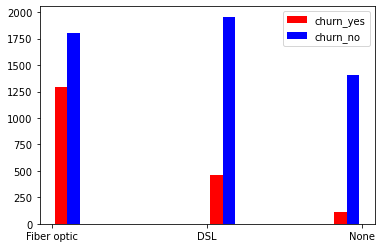

In [10]:
is_not_churn = telco_df[telco_df.churn == "No"].internet_service_type
is_churn = telco_df[telco_df.churn == "Yes"].internet_service_type


# plt.ylabel("$customers$")
# plt.xlabel ("$telco_df.tenure$")
# plt.title ("Tenure and Churned Customers")
plt.hist([is_churn, is_not_churn], 
          color = ["red", "blue"], 
          label = ["churn_yes", "churn_no"]) 
plt.legend()

### Bivariate Analysis


clear the customer_id column

In [11]:
columns_dropped = ["customer_id"]
telco_df = telco_df.drop(columns = columns_dropped)

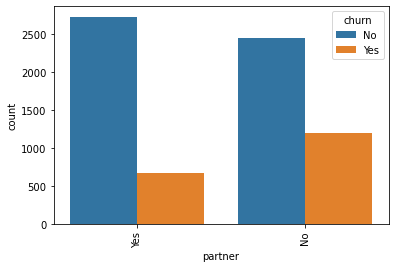

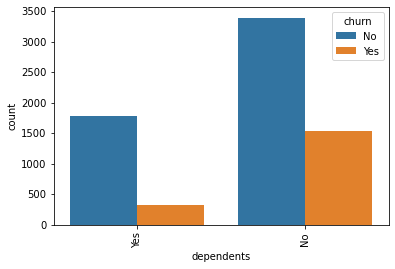

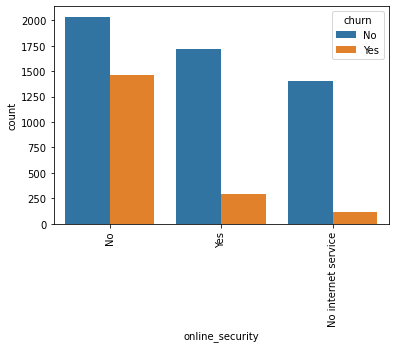

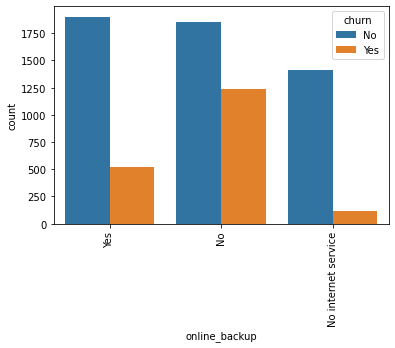

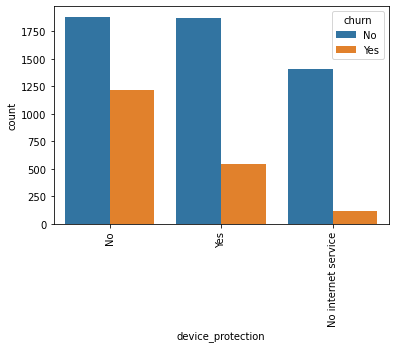

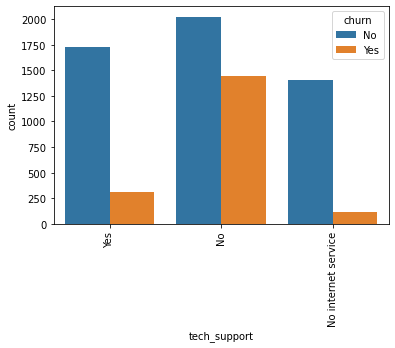

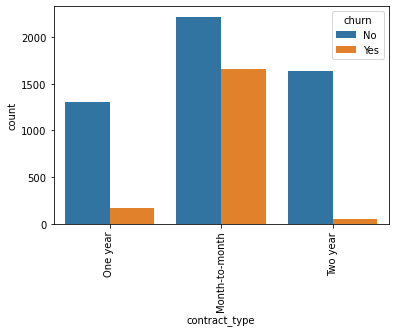

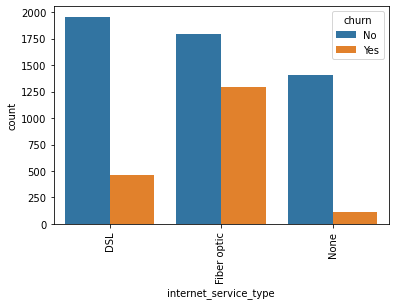

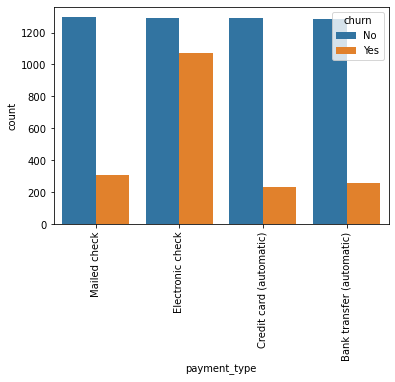

In [12]:
for i, predictor in enumerate(telco_df.drop(columns=['senior_citizen','paperless_billing','churn','tenure', 'gender','total_charges', 'monthly_charges','contract_type_id','payment_type_id', 'internet_service_type_id','contract_type_id','phone_service','streaming_movies','streaming_tv','multiple_lines'])):
    plt.figure(i)
    plot= sns.countplot(data=telco_df, x=predictor, hue='churn')
    plt.setp(plot.get_xticklabels(), rotation=90)    



### Takeaways
- It appears that customers with no partners and no dependents have a high churn rate
- Customers with no online backup, no online security, no device protection, and no tech support have a higher probability of churning than those who do
- month to month contract type, fiber optic internet service and electronic check paypent also have a high probability of churning

checking statistical features on specific variables 

In [13]:
temp_df = telco_df.drop(columns=['senior_citizen','contract_type_id','payment_type_id', 'internet_service_type_id','contract_type_id','phone_service','streaming_movies','streaming_tv','multiple_lines'])
temp_df.describe().T


,count,mean,std,min,25%,50%,75%,max
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
monthly_charges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
total_charges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


### Hypothesis testing   
    


In [14]:
alpha = 0.05

### I used pearsons R for linear relationship/ correlation

### customers with tenure
Initial Hypotheses

$H_0$: tenure does not have any effect on whether a customer will churn or not

$H_1$: customers with tenure below one year(new customers) are  likely to churn more than customers past the year mark 

Outcome: I rejected the Null Hypothesis; customers under the one-year tenure mark are one of the highest rated churn groups .


### customers with certain payment_type
Initial Hypotheses

$H_0$: Method of payment does not have any effect on whether a customer will churn or not

$H_1$: customers with electronic check type of payment are likely to churn more than any other method of payment 

Outcome: I rejected the Null Hypothesis; there is a high positive  between the method of payment and the churn rate.





##### for the categorical variables I used Chi2

In [15]:
p_value_df = pd.read_csv('p_value.csv')
p_value_df


,Unnamed: 0,variables,p_values,hypothesis
0,0,Monthly Charges,1.073627e-35,Reject the null hypothesis
1,1,Total Charges,1.295547e-34,Reject the null hypothesis
2,2,Tenure,4.577514e-115,Reject the null hypothesis
3,3,Partner,3.578599e-19,Reject the null hypothesis
4,4,Dependents,1.538574e-24,Reject the null hypothesis
5,5,Multiple Lines,9.985216e-04,Reject the null hypothesis
6,6,Online Security,1.213117e-29,Reject the null hypothesis
7,7,Online Backup,2.031212e-05,Reject the null hypothesis
8,8,Device Protection,1.887008e-04,Reject the null hypothesis
9,9,Tech Support,2.376481e-23,Reject the null hypothesis


# Feature Modeling

Correlation Visualization

<AxesSubplot:>

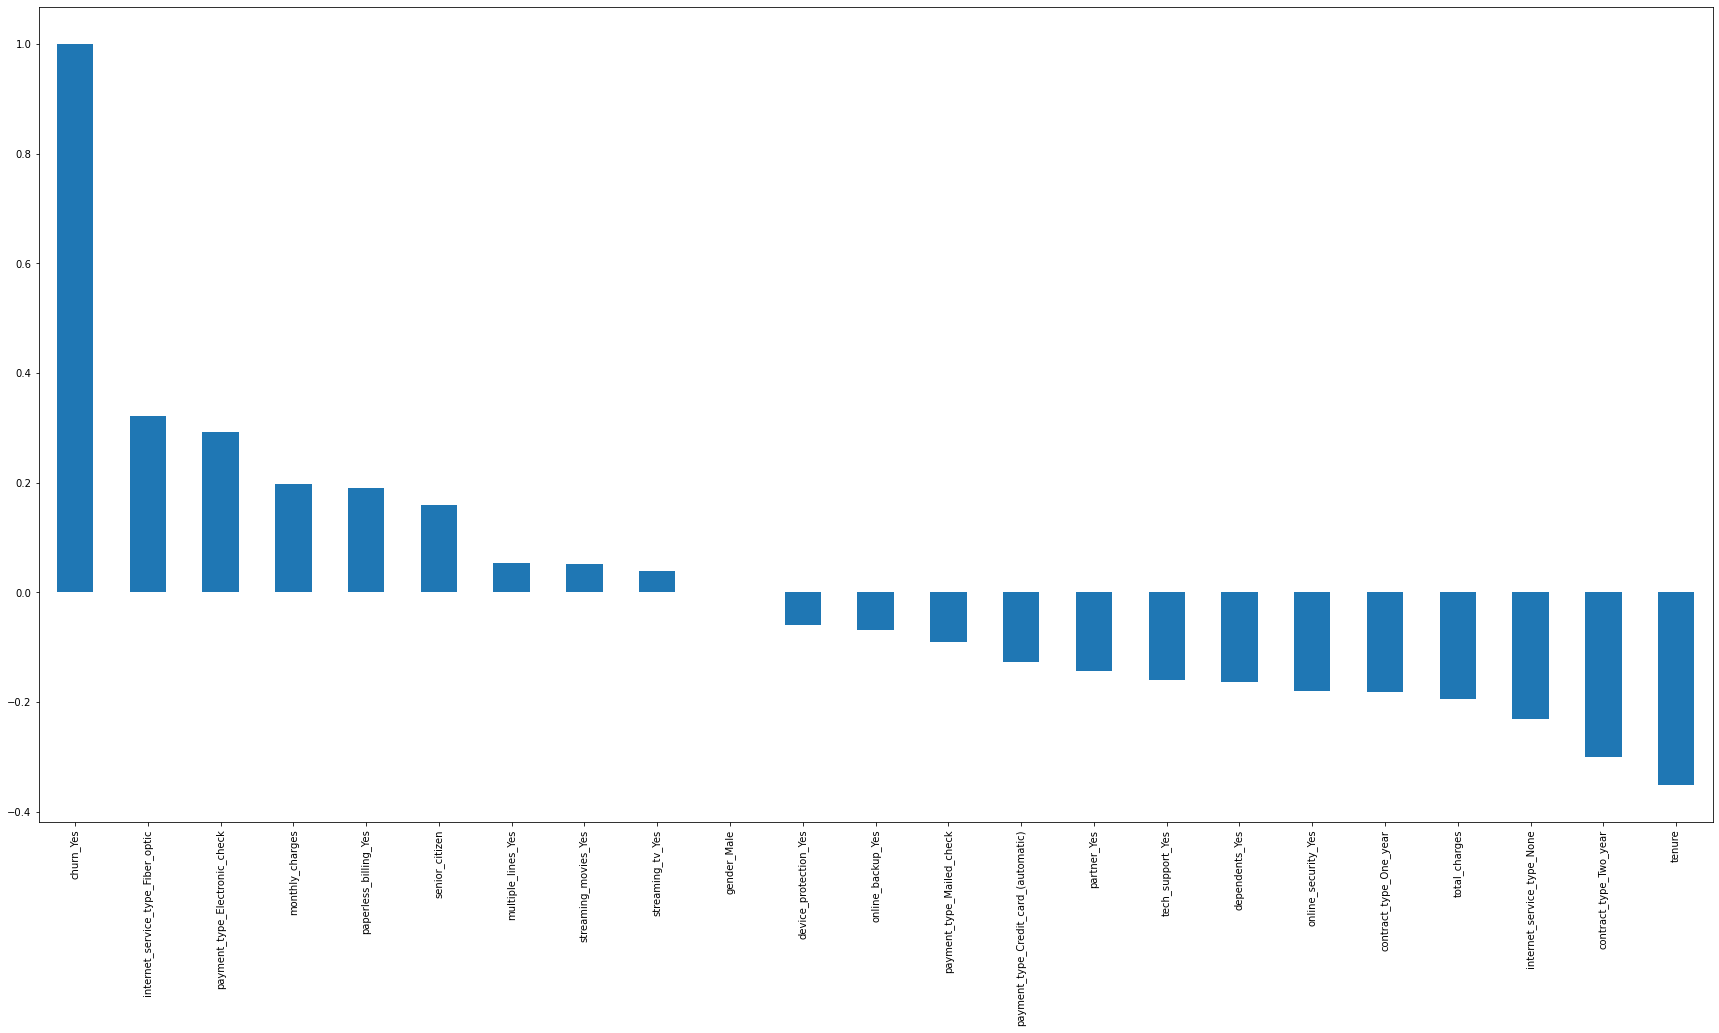

In [16]:
plt.figure(figsize=(30,15))
train.corr()['churn_Yes'].sort_values(ascending = False).plot(kind='bar')

evaluation of the current train data set

In [17]:
from sklearn.model_selection import train_test_split

def train_validate_test_split(df, target, seed=123):
    '''
    This function takes in the telco df, the name of the target variable
    (for stratification purposes), and an integer for a setting a seed
    and splits the data into train, validate and test. 
    Test is 20% of the original dataset, validate is .30*.80= 24% of the 
    original dataset, and train is .70*.80= 56% of the original dataset. 
    The function returns, in this order, train, validate and test dataframes. 
    '''
    train_validate, test = train_test_split(df, test_size=0.2, 
                                            random_state=seed, 
                                            stratify=df[target])
    train, validate = train_test_split(train_validate, test_size=0.3, 
                                       random_state=seed,
                                       stratify=train_validate[target])
    return train, validate, test

In [18]:
train, validate, test = train_validate_test_split(train, target = "churn_Yes", seed =123)

X_train = train.drop(columns = ["churn_Yes"])
y_train = train.churn_Yes

X_validate = validate.drop(columns = ["churn_Yes"])
y_validate = validate.churn_Yes

X_test = test.drop(columns = ["churn_Yes"])
y_test = test.churn_Yes

### Baseline

In [19]:
import statistics
# The mode is a great baseline
baseline = y_train.mode()


# Produce a boolean array with True representing a match between the baseline prediction and reality
matches_baseline_prediction = (y_train == 0)

baseline_accuracy = matches_baseline_prediction.mean()
print(f"Baseline accuracy: {round(baseline_accuracy, 2)}")
baseline

Baseline accuracy: 0.73


0    0
dtype: uint8

## New Train Dataset 

#### After running some decision tree models with the train data, it appears that the model has an F1 score of ~50 for the churners. 
#### It appears that churned data is under represented in the model with a ratio of = 0.73: 0.27 on the train dataset
#### This prompts for an upsample for the training data set


In [20]:
100*train["churn_Yes"].value_counts()/len(train["churn_Yes"])

0    73.411978
1    26.588022
Name: churn_Yes, dtype: float64

In [21]:
churners = train[train["churn_Yes"] == 1]
non_churners  = train[train["churn_Yes"] == 0]

from sklearn.utils import resample
churners_upsample = resample(churners,
             replace=True,
             n_samples=len(non_churners),
             random_state=42)



Great success

In [22]:
new_train = pd.concat([churners_upsample, non_churners])

100*new_train["churn_Yes"].value_counts()/len(new_train["churn_Yes"])

1    50.0
0    50.0
Name: churn_Yes, dtype: float64

In [23]:
new_train, validate, test = train_validate_test_split(new_train, target = "churn_Yes", seed =123)

X_train_new = new_train.drop(columns = ["churn_Yes"])
y_train_new = new_train.churn_Yes

X_validate = validate.drop(columns = ["churn_Yes"])
y_validate = validate.churn_Yes

X_test = test.drop(columns = ["churn_Yes"])
y_test = test.churn_Yes

### Decision Tree model

  Making the model & Fitting the model 
  evaluate the model's performance on train, first

In [24]:
tree3 = DecisionTreeClassifier(max_depth=3, random_state=123)

tree3 = tree3.fit(X_train_new, y_train_new)

y_pred_dt = tree3.predict(X_train_new)

#### looped multiple  decision trees to find the most optimal models
#### max depth of 8 seems like the only viable model

In [56]:
df_dt = pd.read_csv("decision_tree_df")
df_dt.sort_values(by = "difference", axis=0, ascending=True).head()

,max_depth,train_accuracy,validate_accuracy,difference
0,2,0.722606,0.701149,0.021457
2,4,0.784798,0.749425,0.035372
1,3,0.769003,0.726437,0.042566
4,6,0.845015,0.770115,0.074900
3,5,0.815400,0.724138,0.091262


### Random forest with the new_train 

In [26]:
new_train, validate, test = train_validate_test_split(new_train, target = "churn_Yes", seed =123)

X_train_new = new_train.drop(columns = ["churn_Yes"])
y_train_new = new_train.churn_Yes

X_validate = validate.drop(columns = ["churn_Yes"])
y_validate = validate.churn_Yes

X_test = test.drop(columns = ["churn_Yes"])
y_test = test.churn_Yes


In [27]:
rf_new = RandomForestClassifier(max_depth=5, 
                            random_state=123)

In [28]:
rf_new = rf_new.fit(X_train_new, y_train_new)

In [29]:
y_pred_new = rf_new.predict(X_train_new)
y_pred_proba_new = rf_new.predict_proba(X_train_new)
y_pred_proba_new[0:5]

array([[0.34988959, 0.65011041],
       [0.52808769, 0.47191231],
       [0.92501778, 0.07498222],
       [0.41778086, 0.58221914],
       [0.63859257, 0.36140743]])

In [30]:
y_pred_proba_new = rf_new.predict_proba(X_train_new)


In [31]:
print('Accuracy of Decision Tree classifier on validate set: {:.2f}'
     .format(rf_new.score(X_validate, y_validate)))

Accuracy of Decision Tree classifier on validate set: 0.77


In [32]:
y_pred_new = rf_new.predict(X_validate)

# Compare actual y values (from validate) to predicted y_values from the model run on X_validate
print(classification_report(y_validate, y_pred_new))

              precision    recall  f1-score   support

           0       0.79      0.73      0.76       218
           1       0.75      0.81      0.78       217

    accuracy                           0.77       435
   macro avg       0.77      0.77      0.77       435
weighted avg       0.77      0.77      0.77       435



## model optimization

In [64]:
df_rf = pd.read_csv("random_forest_df")
df_rf.sort_values(by= "validate_accuracy",ascending=False).head()


,max_depth,train_accuracy,validate_accuracy,difference
12,14,0.852087,0.827586,0.024501
7,9,0.825318,0.825287,0.000030
14,16,0.849819,0.822989,0.026830
20,22,0.848004,0.822989,0.025015
16,18,0.847096,0.822989,0.024108


#### Takeaways

- best model in this has 14 maxdepth samples per leaf and has 85% train accuracy and 82% validate accuracy
- so far this is the best model


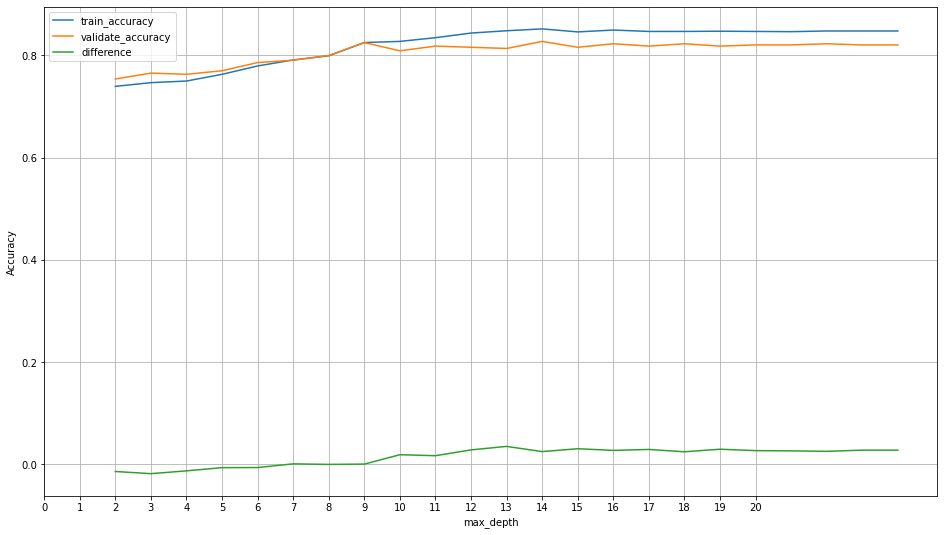

In [65]:
df_rf.set_index('max_depth').plot(figsize = (16,9))
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,21,1))
plt.grid()

### KNN MODEL

#### Categories neccessary for KNN model
I chose to go with the top 5 according to the p values

In [38]:
p_value_df.sort_values(by = "p_values").head()

,Unnamed: 0,variables,p_values,hypothesis
10,10,Contract Type,7.326182e-257,Reject the null hypothesis
2,2,Tenure,4.577514e-115,Reject the null hypothesis
11,11,Fiber Optic Internt,2.831420e-90,Reject the null hypothesis
12,12,Electronic Check Payments,7.910588e-75,Reject the null hypothesis
0,0,Monthly Charges,1.073627e-35,Reject the null hypothesis


In [39]:
x_cols = ["monthly_charges","tenure","internet_service_type_Fiber_optic", "internet_service_type_Fiber_optic","contract_type_Two_year","payment_type_Electronic_check"]
y_col = "churn_Yes"

In [40]:
X_train_knn, y_train_knn = new_train[x_cols], new_train[y_col]
X_validate_knn, y_validate_knn = validate[x_cols], validate[y_col]
X_test_knn, y_test_knn = test[x_cols], test[y_col]

In [41]:
knn10 = KNeighborsClassifier(10)
knn10.fit(X_train_knn, y_train_knn)  
y_pred_knn = knn10.predict(X_train_knn)

In [42]:
print(classification_report(y_train_knn, y_pred_knn))

              precision    recall  f1-score   support

           0       0.76      0.79      0.78       506
           1       0.79      0.75      0.77       507

    accuracy                           0.77      1013
   macro avg       0.77      0.77      0.77      1013
weighted avg       0.77      0.77      0.77      1013



In [43]:
report = classification_report(y_train_knn, y_pred_knn, output_dict=True)
print("n_neighbour = 10")
pd.DataFrame(report)

n_neighbour = 10


,0,1,accuracy,macro avg,weighted avg
precision,0.762808,0.786008,0.773939,0.774408,0.774420
recall,0.794466,0.753452,0.773939,0.773959,0.773939
f1-score,0.778316,0.769386,0.773939,0.773851,0.773846
support,506.000000,507.000000,0.773939,1013.000000,1013.000000


In [44]:
pd.crosstab(y_train_knn, y_pred_knn)


col_0,0,1
churn_Yes,,
0,402,104
1,125,382


### takeaways
after running a few models with KNN, the accuracy of the models were lower and less efficient than the decision trees

## Test my best model

In [68]:
best_model = RandomForestClassifier(max_depth=14, 
                            random_state=123)

In [69]:
best_model = best_model.fit(X_train_new, y_train_new)

In [74]:

best_model = RandomForestClassifier(max_depth=14, 
                            random_state=123)
best_model = best_model.fit(X_train_new, y_train_new)
test.reset_index()

y_predictions = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)
y_proba = y_proba[:,1]
predictions = pd.DataFrame({
    "index" : test.index, # since the customer_id is dropped from X_test, we'll use test here since the indexes line up
    "prediction": y_predictions,
    "probability_of_churn": y_proba
})

predictions.to_csv("predictions.csv",index = 0)

In [75]:
pd.read_csv("predictions.csv")

,index,prediction,probability_of_churn
0,1631,0,0.283333
1,5569,0,0.020000
2,1976,1,0.879627
3,1587,0,0.110000
4,3964,1,0.898571
...,...,...,...
358,943,1,1.000000
359,1438,0,0.082500
360,3646,1,0.890000
361,1794,1,0.990000


In [76]:
actual_test = y_test
predicted_test = best_model.predict(X_test)
print(classification_report(actual_test, predicted_test))


              precision    recall  f1-score   support

           0       0.86      0.81      0.84       181
           1       0.82      0.87      0.84       182

    accuracy                           0.84       363
   macro avg       0.84      0.84      0.84       363
weighted avg       0.84      0.84      0.84       363



In [77]:
TN, FP, FN, TP = confusion_matrix(actual_test,predicted_test).ravel()
ALL = TP + TN + FP + FN

TN, FP, FN, TP

(147, 34, 24, 158)

In [78]:
def show_scores(TN, FP, FN, TP):
    
    ALL = TP + TN + FP + FN
    
    accuracy = (TP + TN)/ALL # How often did the model get it right?
    precision = TP/(TP+FP) # What is the quality of a positive prediction made by the model?
    recall = TP/(TP+FN) # How many of the true positives were found?   
    
    true_positive_rate = TP/(TP+FN) # Same as recall, actually
    true_negative_rate = TN/(TN+FP) # How many of the true negatives were found?
    false_positive_rate = FP/(FP+TN) # How often did we miss the negative and accidentally call it positive?
    false_negative_rate = FN/(FN+TP) # How often did we miss the positive and accidentally call it negative?
    
    f1_score = 2*(precision*recall)/(precision+recall) # Harmonic mean, good for imbalanced data sets
    support_pos = TP + FN # Number of actual positives in the sample
    support_neg = FP + TN # Number of actual negatives in the sample
    
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"True Positive Rate: {true_positive_rate}")
    print(f"True Negative Rate: {true_negative_rate}")
    print(f"False Positive Rate: {false_positive_rate}")
    print(f"False Negative Rate: {false_negative_rate}")
    print(f"F1 Score: {f1_score}")
    print(f"Support (0): {support_pos}")
    print(f"Support (1): {support_neg}")

In [79]:
show_scores(TN, FP, FN, TP)

Accuracy: 0.8402203856749312
Precision: 0.8229166666666666
Recall: 0.8681318681318682
True Positive Rate: 0.8681318681318682
True Negative Rate: 0.8121546961325967
False Positive Rate: 0.1878453038674033
False Negative Rate: 0.13186813186813187
F1 Score: 0.8449197860962567
Support (0): 182
Support (1): 181


## Conclusion
#### These are the recommendations after observing the factors that contribute to churn 

#### incentivise month to month contracts to switch to yearly
#### discontinue/discourage electronic check payment system for payment purposes.
#### have package deals and promote online security, online backup to internet customers.
#### invest in tech support and investigate more on customer satisfaction with the service
#### fiber optic customers have a high churn rate, if possible we can try to collect industry data and see why the customer have a propensity to churn
#### lastly reducing monthly payments might also decrease the churn rate since there is a high correlation between churning and higher monthly payments 